# **Masking using a VI and canopy coverage**


## **Import Libraries**

In [ ]:
#Importação das bibliotecas necessárias para rodar o código
%matplotlib inline

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_mask(imgt):
    #Split Image in 3 channels
    blue,green,red = cv2.split(imgt)
    #Normalize values
    green = np.divide(green,255)
    red = np.divide(red,255)
    blue = np.divide(blue,255)

    #Sum of normalized values
    norm = red+green+blue

    r = np.divide(red, norm, out=np.zeros_like(red), where=norm!=0)
    g = np.divide(green, norm, out=np.zeros_like(green), where=norm!=0)
    b = np.divide(blue, norm, out=np.zeros_like(blue), where=norm!=0)
    
    #ExG - ExR
    midx = ((2*g) - r - b) - ((1.4*r) - g)

    #Binarize image
    midx[midx<0] = 0
    midx[midx>0] = 1
    imager = (midx*255).astype('uint8')
    return(imager)

In [ ]:
#Definição das pastas necessárias para rodar o script
img_dir = '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/e._Resize_img_annot/Plots_img'
img_mask_dir = '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot'

In [ ]:
#Apresenta as imagens dentro do diretório com o respectivo formato da imagem
img_list = sorted(os.listdir(img_dir))
img_list = [v for v in img_list if v.endswith('.png') and not v.endswith('_msk.png')]
print(img_list)

['2201_1001_7m.png', '2201_1002_7m.png', '2201_1003_7m.png', '2201_1004_7m.png', '2201_1005_7m.png', '2201_1006_7m.png', '2201_1007_7m.png', '2201_1008_7m.png', '2201_1009_7m.png', '2201_1010_7m.png', '2201_1011_7m.png', '2201_1012_7m.png', '2201_1013_7m.png', '2201_1014_7m.png', '2201_1015_7m.png', '2201_1016_7m.png', '2201_1017_7m.png', '2201_1018_7m.png', '2201_1019_7m.png', '2201_1020_7m.png', '2201_1021_7m.png', '2201_1022_7m.png', '2201_1023_7m.png', '2201_1024_7m.png', '2201_1025_7m.png', '2201_1026_7m.png', '2201_1027_7m.png', '2201_1028_7m.png', '2201_1029_7m.png', '2201_1030_7m.png', '2201_1031_7m.png', '2201_1032_7m.png', '2201_1033_7m.png', '2201_1034_7m.png', '2201_1035_7m.png', '2201_1036_7m.png', '2201_2001_7m.png', '2201_2002_7m.png', '2201_2003_7m.png', '2201_2004_7m.png', '2201_2005_7m.png', '2201_2006_7m.png', '2201_2007_7m.png', '2201_2008_7m.png', '2201_2009_7m.png', '2201_2010_7m.png', '2201_2011_7m.png', '2201_2012_7m.png', '2201_2013_7m.png', '2201_2014_7m.png',

In [ ]:
cov_list = []
for img in img_list:
    imagem = cv2.imread(os.path.join(img_dir, img)) #Carrega a imagem

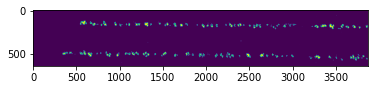

In [ ]:
msk = get_mask(imagem)
plt.imshow(msk>100)

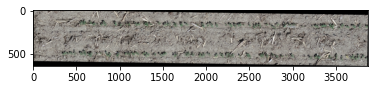

In [ ]:
plt.imshow(imagem[:,:,[2,1,0]])

In [ ]:
cov_list = []
for img in img_list:
    imagem = cv2.imread(os.path.join(img_dir, img)) #Carrega a imagem

    msk = get_mask(imagem)
    
    mult = 255 
    msk = mult * (msk > 100).astype('uint8') # mask output in % ((msk < 100) + (msk > 100) = 1)
    cov_list.append([img, (msk > 0).mean().round(8)]) ## saving canopy coverage area
    msk_name = os.path.join(img_mask_dir, img.replace('.png', '_msk.png'))

    print(msk_name) #Apresenta o nome da máscara com o diretório a ser salvo
    cv2.imwrite(msk_name, msk) #Realiza o salvamento do background

In [ ]:
cov = np.array(cov_list)
np.savetxt('/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/j._Analysis&Results/canopy_area/6_13_22_SVREC_RGB_7m2.csv', cov, delimiter= ',', fmt="%s")